# About This Notebook  
This notebook shows how I explored real and fake job listings using simple data analysis. The goal is to spot fake job posts that might mislead people and understand what makes them look different from real ones. Everything here is written in clear, easy language so anyone can follow the steps and learn from it.

---

<a id="project-introduction"></a>
# Project Introduction

This project is about finding the difference between real and fake job postings using data analysis. The goal is to understand how fake job posts look and what makes them different from real ones.

---

# Project Title
**Real vs. Fake Job Posting Analysis**

---

## Project Summary & Key Findings

I studied **17,880 job posts** to understand how real and fake listings are different. The study showed a few clear signs that help spot fake jobs easily.

#### Missing Company Info is a Big Warning  
Fake jobs often don’t have a company logo or profile. If a post hides basic company details, it’s usually not real.

#### Very Short or Vague Descriptions  
Fraud jobs mostly have short or unclear job descriptions. Real jobs usually explain roles and skills clearly.

#### “Work From Home” and “Easy Money” Words  
Fake job posts often use words like **“work from home,” “quick cash,”** or **“no experience.”** These are red flags when seen together.

#### Main Suggestion  
We can add a **Trust Score** for every new job post. If a job has no company info, short description, or uses suspicious words, the system can flag it for review before it goes live. This will help keep job seekers safe and improve platform trust.

---

# 📘 Contents

1. [Project Introduction](#project-introduction)
2. [Objective](#objective)
3. [Key Tasks](#key-tasks)
4. [Tools Used](#tools-used)
5. [Exploring the Dataset](#exploring-the-dataset)
6. [Data Cleaning](#data-cleaning)
7. [Charts and Visual Analysis](#charts-and-visual-analysis)
8. [Suspicious Pattern Detection](#suspicious-pattern-detection)
9. [Business Use Case](#business-use-case)
10. [Project Summary and Conclusion](#project-summary-and-conclusion)
11. [What I Learned](#what-i-learned)

---

<a id="objective"></a>
# Business Objective

Many job portals have fake job postings that mislead job seekers and reduce trust in the platform. In this project, we study a large set of job listings to find patterns that separate real jobs from fake ones. By doing this, we can get useful insights and also in future we can build a simple model that helps job portals detect and flag fake listings automatically.

So to understand what makes a job post look real or fake. Many people get fooled by online job scams that promise quick money or remote work. By studying patterns in real and fake job posts, we can find the common warning signs.

This analysis will help us:
- Spot risky job posts early.
- Protect job seekers from scams.
- Build trust on hiring platforms by showing only verified and safe listings.

In short, we want to turn data into simple rules that tell us which job posts look safe and which ones need a closer look.

---

# Dataset Overview

This dataset has information about many job posts. Each row is one job post with details like company name, location, job title, and description. Some posts are real, and some are fake — the goal is to see how they are different.

This dataset helps us study what makes a job post look **real or fake**. It contains **17,880 job postings with 18 columns.**  
Each row represents one job listing with details like title, company, location, description, and whether it’s genuine or not.


### Key Columns (Data Dictionary)

| Column Name | Meaning |
|--------------|----------|
| title | The job title mentioned in the post |
| location | The place where the job is based |
| department | Department or team name (if given) |
| salary_range | Salary details if the company shared it |
| company_profile | Short about the company |
| description | Full job description |
| requirements | Skills or experience needed for the job |
| benefits | Extra benefits mentioned (if any) |
| telecommuting | 1 if remote work is allowed, 0 if not |
| has_company_logo | 1 if logo is present, 0 if missing |
| has_company_profile | 1 if company profile is present, 0 if missing |
| employment_type | Type of work (Full-time, Part-time, Contract, etc.) |
| required_experience | Level of experience asked for |
| required_education | Education level required |
| industry | Type of business or industry |
| function | Type of job function (e.g., Sales, IT, etc.) |
| fraudulent | 1 if the job post is fake, 0 if real |

The dataset has a mix of **text columns** (like description and requirements) and **numeric flags** (like has_company_logo). Some columns such as *salary_range* or *department* are missing in many rows, so they were cleaned and standardized before analysis.

This dataset helps us look at job details and find what patterns appear more often in fake job posts.

---

<a id="key-tasks"></a>
# Key Tasks
1. Go through the data that includes company details, job titles, requirements, and whether the job is real or fake.  
2. Clean and prepare the data so it can be used for analysis.  
3. Create graphs and charts to compare real and fake job listings.  
4. Find the main signs that show a job post might be fake.  

---

<a id="tools-used"></a>
# Tools Used
- Python (Pandas, NumPy, Matplotlib, Seaborn)  
- Jupyter Notebook
---
Now, let’s start by looking at the dataset and understanding what kind of information it has.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# Set style for plots
sns.set(style="whitegrid")

# Load dataset
df = pd.read_csv("fake_job_postings.csv")  # make sure the file is in the same folder as your notebook

# Preview data
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (17880, 18)


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


<a id="exploring-the-dataset"></a>
# Dataset Loading and Initial Preview

This step shows how the **fake job postings dataset** was loaded and reviewed before analysis.

**Explanation of the Code**
1. **Libraries Imported:**
   - `pandas` and `numpy` — for data handling and numeric operations.
   - `matplotlib` and `seaborn` — for creating charts and visualizations.
2. **Dataset Loaded:**
   - The dataset file `fake_job_postings.csv` is read using `pd.read_csv()`.
   - The shape of the dataset is printed, showing **17,880 rows** and **18 columns**.
3. **Preview Data:**
   - The first five records (`df.head()`) display important columns such as job title, location, company profile, and description.

---

**Observation from Sample Data**
- Each row represents one job posting.  
- The dataset includes text fields (`title`, `company_profile`, `description`) and numeric fields (`telecommuting`, `has_company_logo`, `fraudulent`).  
- Some values are missing in columns like `salary_range` and `benefits`.  
- The column **fraudulent** will act as the **target variable**, where:
  - `0` means a **real job**
  - `1` means a **fake job**

---

**What We Learn**
- The dataset is well-structured and ready for data cleaning and exploration.  
- There are a mix of descriptive (text) and categorical (numeric) features.  
- Early data inspection helps identify missing values and column relevance.

**Key Point**
The dataset is successfully loaded and verified — a clean starting point for further analysis.

In [2]:
# Check basic info and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

# Basic Dataset Information and Data Types

This output shows the **structure** of the dataset, including the number of rows, column names, missing values, and data types for each feature.

**Summary of the Dataset**  
- Total Rows: **17,880 job postings**  
- Total Columns: **18**  
- Memory Usage: **2.5 MB**  
- The dataset includes both numeric and text (object) columns.  
- Columns like `job_id`, `telecommuting`, `has_company_logo`, and `fraudulent` are numeric.  
- Other columns such as `title`, `location`, `company_profile`, and `description` contain text data.

---

**Observation on Missing Data**  
- Some columns have missing values, for example:  
  - `department` has only **6333** entries filled out.  
  - `company_profile` and `requirements` also have missing data.  
- These missing values will need to be cleaned or handled before analysis.

---

**What We Learn**  
- The dataset mixes categorical (text) and numerical fields.  
- It contains key features like job title, company info, job description, and fraud labels.  
- Cleaning, encoding, and transforming this data are necessary steps before analysis.

**Key Point**  
Understanding the dataset’s **structure and missing values** is the first step to preparing it for **data cleaning**.


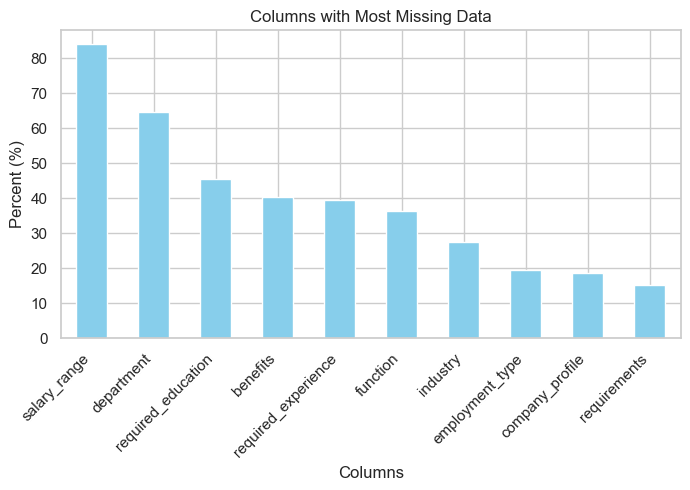

In [3]:
# Check missing values in each column
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_data / len(df)) * 100

# Combine into one DataFrame
missing_df = pd.DataFrame({'Missing Values': missing_data, 'Percent (%)': missing_percent})
missing_df = missing_df[missing_df['Missing Values'] > 0]  # show only columns with missing data

# Display top missing columns
missing_df.head(10)

plt.figure(figsize=(8,4))
missing_df['Percent (%)'].head(10).plot(kind='bar', color='skyblue')
plt.title('Columns with Most Missing Data')
plt.ylabel('Percent (%)')
plt.xlabel('Columns')
plt.xticks(rotation=45, ha='right')
plt.show()

# 🧩 Missing Data Overview

---

Before cleaning the data, I checked how many values were missing in each column.

Some columns like **company_profile**, **salary_range**, and **department** had missing values. This is common in real-world job data because not all companies provide full details.

To make the dataset more complete, I later filled missing text values with “Unknown” and handled numeric or flag columns carefully during cleaning.

- This step helped me understand which parts of the data needed the most fixing before analysis.

---

In [4]:
# Get summary statistics for numeric columns
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


# Summary Statistics for Numeric Columns

This table shows key **statistical information** for all numeric columns in the dataset.

**Columns Displayed:**
- `job_id` – Unique identifier for each job posting.  
- `telecommuting` – Indicates if the job allows remote work (1 = Yes, 0 = No).  
- `has_company_logo` – Shows if a company logo is present (1 = Yes, 0 = No).  
- `has_questions` – Whether the job posting includes screening questions (1 = Yes, 0 = No).  
- `fraudulent` – Target column (1 = Fake job, 0 = Real job).  

---

**Key Observations:**
- **Mean of `fraudulent` = 0.048**, meaning about **4.8% of job postings are fake**, while **95.2% are real** — showing a **highly imbalanced dataset**.  
- **`has_company_logo` mean = 0.79**, so most real job postings include a company logo.  
- **`telecommuting` mean = 0.04**, meaning only **4% of jobs are remote**.  
- **`has_questions` mean = 0.49**, indicating nearly half of postings include screening questions.

---

**What We Learn:**
- The dataset is dominated by **onsite, real jobs** with company logos.  
- The **fake jobs** form a small fraction, making this a **class imbalance problem**.  
- Features like **company logo** and **screening questions** could help identify fake postings.

---

**Key Point:**
The statistical overview highlights that **fake jobs are rare**, and columns such as `has_company_logo` and `telecommuting` may be **important indicators** for fraud detection.

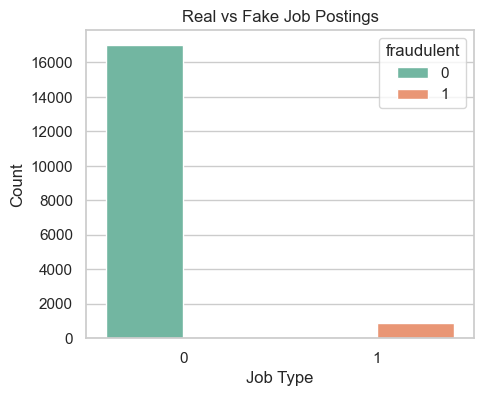

In [5]:
# Explore distribution of target variable
fraud_counts = df['fraudulent'].value_counts().reset_index()
fraud_counts.columns = ['fraudulent', 'count']

plt.figure(figsize=(5, 4))
sns.barplot(data=fraud_counts, x='fraudulent', y='count', hue='fraudulent', palette='Set2')
plt.title('Real vs Fake Job Postings')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.savefig('real_vs_fake_jobs.png', bbox_inches='tight')
plt.show()

This chart shows that most job listings are real, and only a small portion are fake. Even though fake jobs are fewer, they are important to detect because they can harm job seekers.

## Explore Distribution of Target Variable

We are analyzing the **target column** `fraudulent`, which identifies whether a job posting is **Real (0)** or **Fake (1)**.  
This helps us understand if our dataset is **balanced** or **imbalanced** — a critical step before doing anything.

---

### Objective
it’s important to know how many real vs fake job postings exist. A large imbalance can make the analysis biased toward the majority class.

---

### Chart Explanation
Element | Description |
|:--|:--|
**X-Axis** | Represents the job type (`0 = Real`, `1 = Fake`) |
**Y-Axis** | Represents the number of job postings in each category |

---

### Key Insights
✅ **Most job postings are Real (0)**  
⚠️ **Only a small fraction are Fake (1)**  
📉 **Dataset is highly imbalanced**

---

### Why It Matters
Ignoring this imbalance could cause:
- Failure to correctly detect fake job postings — which is the real goal.

Hence, this visualization gives our **first warning** that we must handle **class imbalance** carefully in later stages (using resampling or class weighting).

In [6]:
# List unique values for key categorical columns
categorical_cols = ['employment_type', 'required_experience', 'required_education', 'industry', 'function', 'location', 'department']
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].unique()[:10])  # Print a sample

employment_type: 5 unique values
['Other' 'Full-time' nan 'Part-time' 'Contract' 'Temporary']
required_experience: 7 unique values
['Internship' 'Not Applicable' nan 'Mid-Senior level' 'Associate'
 'Entry level' 'Executive' 'Director']
required_education: 13 unique values
[nan "Bachelor's Degree" "Master's Degree" 'High School or equivalent'
 'Unspecified' 'Some College Coursework Completed' 'Vocational'
 'Certification' 'Associate Degree' 'Professional']
industry: 131 unique values
[nan 'Marketing and Advertising' 'Computer Software'
 'Hospital & Health Care' 'Online Media'
 'Information Technology and Services' 'Financial Services'
 'Management Consulting' 'Events Services' 'Internet']
function: 37 unique values
['Marketing' 'Customer Service' nan 'Sales' 'Health Care Provider'
 'Management' 'Information Technology' 'Other' 'Engineering'
 'Administrative']
location: 3105 unique values
['US, NY, New York' 'NZ, , Auckland' 'US, IA, Wever' 'US, DC, Washington'
 'US, FL, Fort Worth' 'US,

In [7]:
# Preview some textual columns for inspection
print(df['company_profile'].sample(3))
print(df['description'].sample(3))

11694    Cardback (#URL_90abbb32080c1fe9e207dea7ce143b8...
4459     We help teachers get safe &amp; secure jobs ab...
12358    Shirley Parsons LLC is a specialist recruitmen...
Name: company_profile, dtype: object
4896     Warehouse clericals and system superusers requ...
10586    Who is Airenvy?Hey there! We are seasoned entr...
958      Experience in HTML, Java, J2EE, JSP, Web Techn...
Name: description, dtype: object


In [8]:
# Quantify missing values by column
missing = df.isnull().sum().sort_values(ascending=False)
print("Missing values by column:")
print(missing)

Missing values by column:
salary_range           15012
department             11547
required_education      8105
benefits                7212
required_experience     7050
function                6455
industry                4903
employment_type         3471
company_profile         3308
requirements            2696
location                 346
description                1
job_id                     0
telecommuting              0
has_questions              0
has_company_logo           0
title                      0
fraudulent                 0
dtype: int64


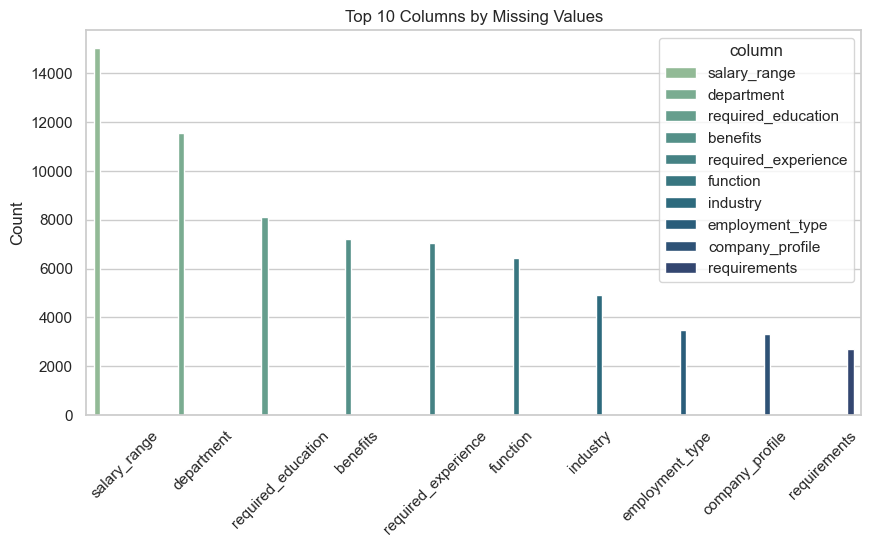

In [9]:
# Create a small DataFrame for top 10 missing columns
missing_df = pd.DataFrame({
    'column': missing.index[:10],
    'count': missing.values[:10]
})

plt.figure(figsize=(10, 5))
sns.barplot(data=missing_df, x='column', y='count', hue='column', palette='crest')
plt.xticks(rotation=45)
plt.title('Top 10 Columns by Missing Values')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

<a id="data-cleaning"></a>
# Top 10 Columns with Missing Values

- This chart shows which columns in the dataset have the most missing values.  
- It helps identify areas that need data cleaning or imputation before analysis.  
- Columns like **salary_range** and **department** have the highest number of missing values.  
- These gaps indicate incomplete or inconsistent information in those fields.

---


In [10]:
# Fill missing values in text columns with "Unknown" or "Not Provided"
text_cols = ['salary_range', 'company_profile', 'benefits', 'requirements', 'description', 'department']
df[text_cols] = df[text_cols].fillna('Unknown')

In [11]:
# Fill missing values in categorical columns with 'Unknown'
cat_cols = ['employment_type', 'required_experience', 'required_education', 'industry', 'function', 'location']
df[cat_cols] = df[cat_cols].fillna('Unknown')

In [12]:
# Create a binary flag for missing company_profile
df['company_missing'] = df['company_profile'].apply(lambda x: 1 if x == 'Unknown' else 0)


In [13]:
# Review the changes
print(df[text_cols + ['company_missing']].head())

  salary_range                                    company_profile  \
0      Unknown  We're Food52, and we've created a groundbreaki...   
1      Unknown  90 Seconds, the worlds Cloud Video Production ...   
2      Unknown  Valor Services provides Workforce Solutions th...   
3      Unknown  Our passion for improving quality of life thro...   
4      Unknown  SpotSource Solutions LLC is a Global Human Cap...   

                                            benefits  \
0                                            Unknown   
1  What you will get from usThrough being part of...   
2                                            Unknown   
3  Our culture is anything but corporate—we have ...   
4                              Full Benefits Offered   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s

### First, let's find out: How big is the problem?

**My first question was:** Are we dealing with a few fake jobs or a massive problem? Let's check how many postings are real versus fake.

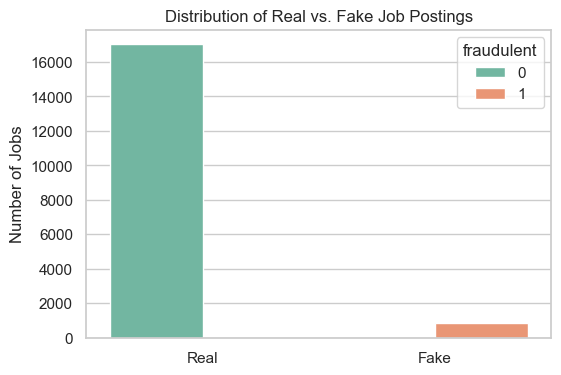

In [14]:
# Plot count of real vs. fake jobs
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='fraudulent', hue='fraudulent', palette='Set2')
plt.xticks([0, 1], ['Real', 'Fake'])
plt.title('Distribution of Real vs. Fake Job Postings')
plt.ylabel('Number of Jobs')
plt.xlabel('')
plt.show()

<a id="charts-and-visual-analysis"></a>
# Distribution of Real vs. Fake Job Postings

This chart shows how many job listings in the dataset are **real** compared to **fake** ones. It helps us quickly understand the overall balance between genuine and fraudulent postings.

---

### Step-by-Step Explanation

- **Purpose of the Plot:**  
  To visualize the number of real and fake job postings in the dataset.

- **Plot Type Used:**  
  A **count plot** (`sns.countplot`) is used to count and display occurrences of each category.

- **Key Parameters in the Code:**
  - `x='fraudulent'` → defines which column to analyze (real or fake).  
  - `hue='fraudulent'` → colors the bars based on the same category.  
  - `palette='Set2'` → gives the bars a pleasant color scheme.  
  - `legend=False` → hides the legend since labels are already clear.  
  - `plt.xticks([0,1], ['Real','Fake'])` → renames the x-axis labels for readability.  
  - `plt.ylabel('Number of Jobs')` → labels the y-axis to show job counts.  
  - `plt.title('Distribution of Real vs. Fake Job Postings')` → adds a clear chart title.  

---

### Interpretation

- The **green bar** represents real job postings.
- The **orange bar** represents fake job postings.
- We can clearly see that **real job ads are much higher in number** than fake ones.  
  This indicates that fraudulent jobs form only a **small fraction** of the total dataset.

---

### Key Insight

- The dataset is **imbalanced**, with far more real jobs than fake ones.

### Next, I wondered: Do scammers try to hide their identity?

**My thinking was:** A real company would proudly display its logo, but a scammer would want to stay anonymous.

**Let's check:** Are fake jobs more likely to be missing a company logo?

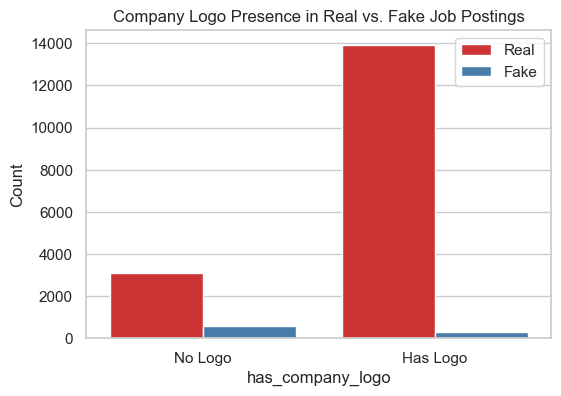

In [15]:
# Compare key features for real vs. fake postings

# 1. Has Company Logo
plt.figure(figsize=(6,4))
sns.countplot(x='has_company_logo', hue='fraudulent', data=df, palette='Set1')
plt.xticks([0, 1], ['No Logo', 'Has Logo'])
plt.legend(labels=['Real', 'Fake'])
plt.title('Company Logo Presence in Real vs. Fake Job Postings')
plt.ylabel('Count')
plt.savefig('company_logo_comparison.png', bbox_inches='tight')
plt.show()

Jobs that include a company logo are almost always real. Fake postings usually skip adding a logo, which makes them easier to identify visually.

# Company Logo Presence in Real vs. Fake Job Postings

This chart shows how the presence of a **company logo** differs between real and fake job posts. It helps us understand if fake job listings usually skip adding a company logo.

---

### What This Chart Tells Us

- Jobs with a **company logo** are mostly **real**.  
- Jobs **without a logo** have a higher chance of being **fake**.  
- Real job posts usually include a logo to look professional and trustworthy.  
- Fake jobs often miss logos—this could be because scammers don’t want to show a real company identity.

---

### Summary

- Having a logo = mostly **real job**  
- No logo = could be **fake job**  
- Logos make a post look **authentic and verified**

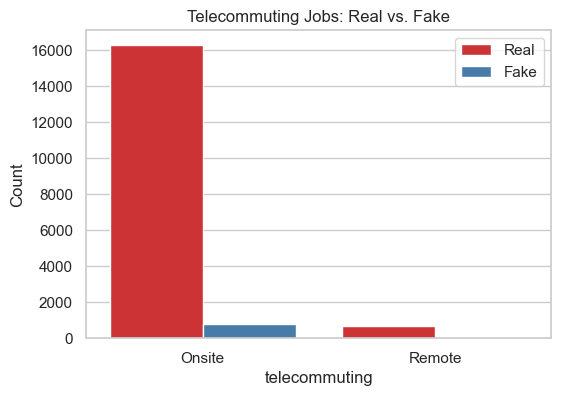

In [16]:
# 2. Telecommuting Jobs
plt.figure(figsize=(6,4))
sns.countplot(x='telecommuting', hue='fraudulent', data=df, palette='Set1')
plt.xticks([0, 1], ['Onsite', 'Remote'])
plt.legend(labels=['Real', 'Fake'])
plt.title('Telecommuting Jobs: Real vs. Fake')
plt.ylabel('Count')
plt.show()

Most real jobs are onsite, while fake ones are slightly more likely to claim to be remote. Scammers often use remote job offers to attract people more easily.

# Telecommuting Jobs: Real vs. Fake

This chart compares **on-site** and **remote (work from home)** job postings to see how many of them are real or fake. It helps us understand if fake job ads are more common in remote positions.

---

### What This Chart Shows

---

- **Onsite jobs** are mostly **real** and have a very high count.  
- **Remote jobs** are much fewer, but a small portion of them are **fake**.  
- Fake jobs are slightly more likely to appear in remote listings than in on-site ones.

---

### Chart Explanation

- The **red bars** represent **real job postings**.  
- The **blue bars** represent **fake job postings**.  
- The **x-axis** shows two types of jobs: 
- **Onsite** → Jobs that require working from the office.
- - **Remote** → Jobs that can be done from home.  
- The **y-axis** shows how many jobs are in each group.

---

### Easy Summary

- Most real jobs are **on-site**.  
- **Fake jobs** are often listed as **remote** to attract more people.  
- Scammers might use remote jobs to hide their real identity and avoid face-to-face checks.

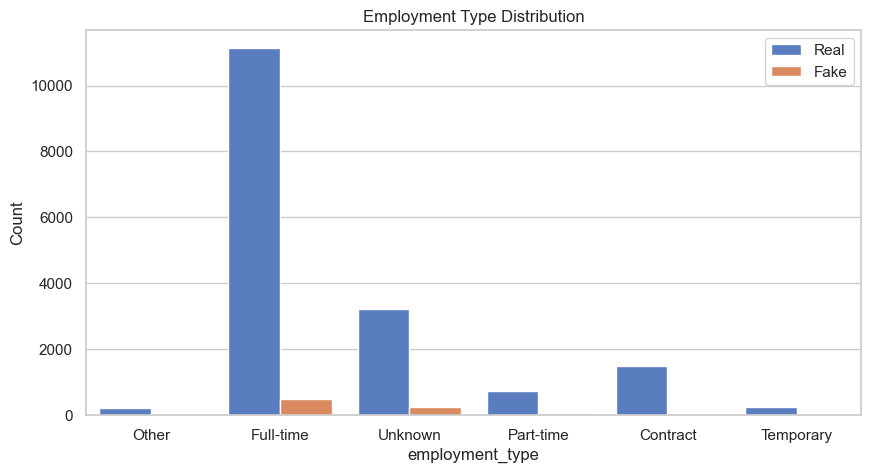

In [17]:
# 3. Employment Type (Top 6)
plt.figure(figsize=(10,5))
top_types = df['employment_type'].value_counts().nlargest(6).index
sns.countplot(x='employment_type', hue='fraudulent', data=df[df['employment_type'].isin(top_types)], palette='muted')
plt.title('Employment Type Distribution')
plt.ylabel('Count')
plt.legend(labels=['Real', 'Fake'])
plt.show()

Most job listings are full-time positions. Fake jobs are mostly listed as full-time too, showing that scammers try to make them look realistic.

# Employment Type Distribution (Top 6)

This chart shows the different types of job roles (like full-time, part-time, contract, etc.) and compares how many of them are **real** and how many are **fake**. It helps to see which job type is more likely to be genuine or suspicious.

---

### 🔹 Chart Explanation

- The **x-axis** shows the top 6 employment types: Other, Full-time, Unknown, Part-time, Contract, and Temporary.  
- The **y-axis** shows the total number of jobs under each type.  
- The **blue bars** represent **real jobs**, and the **orange bars** represent **fake jobs**.  
- **Full-time jobs** dominate the chart—they are the most common and mostly real.  
- A few **fake jobs** also appear under the “Full-time” and “Unknown” types.  
- Categories like **Contract** and **Part-time** have fewer fake listings, meaning they are generally more trustworthy.

---

### 🔹 What We Learn

- Most job postings are for **full-time** roles, and the majority of them are **real**.  
- Some fake jobs appear under **Full-time** and **Unknown**, showing that fraudsters often post full-time offers to look more convincing.  
- **Part-time, contract,** and **temporary** jobs are less frequent and rarely fake.

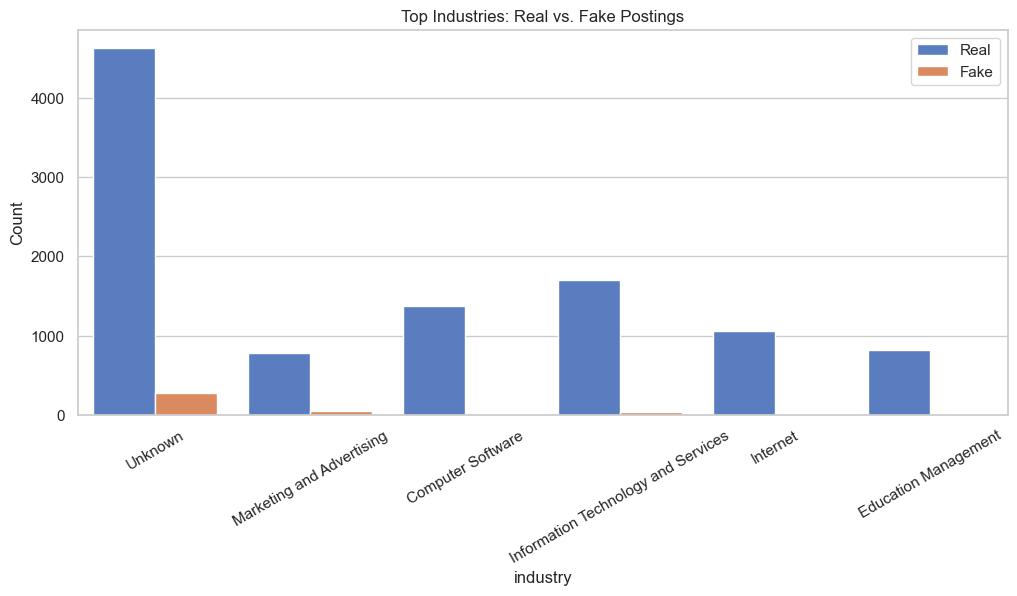

In [18]:
# 4. Industry (Top 6)
plt.figure(figsize=(12,5))
top_industry = df['industry'].value_counts().nlargest(6).index
sns.countplot(x='industry', hue='fraudulent', data=df[df['industry'].isin(top_industry)], palette='muted')
plt.title('Top Industries: Real vs. Fake Postings')
plt.ylabel('Count')
plt.legend(labels=['Real', 'Fake'])
plt.xticks(rotation=30)
plt.show()

# Top Industries: Real vs. Fake Postings

This chart shows which **industries** have the most job postings and compares how many of those are **real** and **fake**. It helps us identify which job sectors are safe and which ones attract more fake listings.

---

### Chart Explanation

- The **x-axis** shows the top 6 industries with the highest number of job posts. These include **Unknown**, **Marketing and Advertising**, **Computer Software**, **Information Technology and Services**, **Internet**, and **Education Management**.  
- The **y-axis** shows how many jobs belong to each industry.  
- **Blue bars** show **real jobs**, and **orange bars** show **fake jobs**.  

From the chart:
- The **Unknown** category has the highest count, which means many postings didn’t clearly mention the industry. It also has a few **fake jobs**, which shows that missing details can be a warning sign.  
- **Computer software** and **IT & services** have many real jobs, meaning these are strong and trusted industries.  
- **Marketing and Advertising** and **Internet** show a few fake job listings, but overall, real ones dominate.

---

### What We Learn

- Jobs in **IT**, **software**, and **education** are mostly **real** and reliable.  
- Listings with **missing or unclear industry names** are riskier and may include fake posts.  
- **Marketing** and **Internet** sectors should be checked carefully—they sometimes attract scams due to easy online reach.

### So, a missing logo is a red flag. What about a missing *profile*?

**My next check:** I noticed scammers usually avoid sharing much info, so I checked if fake job posts also miss the company description.

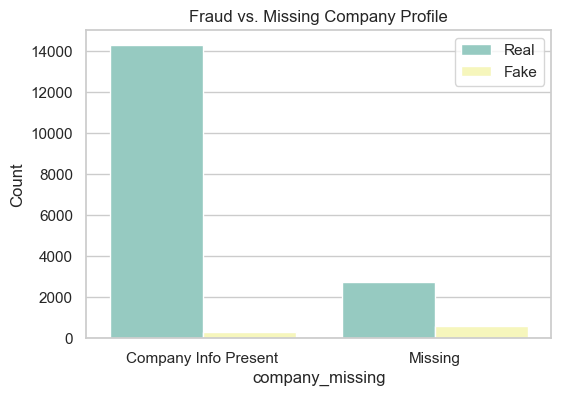

In [19]:
# 5. Missing company_profile flag vs. fraud
plt.figure(figsize=(6,4))
sns.countplot(x='company_missing', hue='fraudulent', data=df, palette='Set3')
plt.xticks([0, 1], ['Company Info Present', 'Missing'])
plt.legend(labels=['Real', 'Fake'])
plt.title('Fraud vs. Missing Company Profile')
plt.ylabel('Count')
plt.show()

Fake job listings often don’t include company details. Real job posts usually have a proper company profile, which makes them easier to trust.

# Fraud vs. Missing Company Profile

This chart compares how many job postings have **company information** and how many are **missing it** and shows how these two groups relate to **real** and **fake** job posts.

### Chart Explanation

---

- The **x-axis** shows two categories: 
  - **Company Info Present** → Jobs where company details are provided.  
  - **Missing** → Jobs where company details are not provided.  
- The **y-axis** shows how many jobs belong to each category.  
- The **green bar** represents **real jobs**, and the **yellow bar** represents **fake jobs**.  

From the chart:
- Most **real job posts** clearly show company information.  
- A large number of **fake jobs** are found where the **company info is missing**.  
- Missing company details often indicate a **fake or suspicious** listing.

---

### What We Learn

- **Real job posts** are transparent—they share proper company profiles.  
- **Fake jobs** usually skip company details to hide their identity.  
- This means missing company info is a **strong signal of fraud**. 

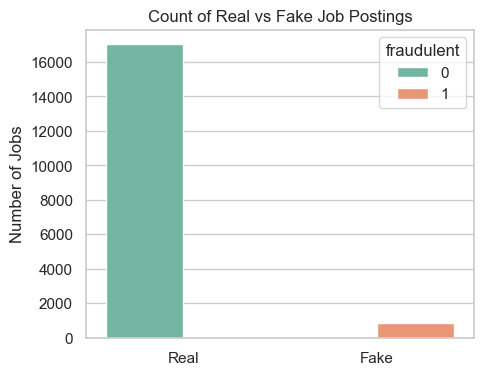

In [20]:
# 1. Distribution of Real vs. Fake Job Postings

plt.figure(figsize=(5, 4))

# Fixed version: added hue + legend=False
sns.countplot(data=df, x='fraudulent', hue='fraudulent', palette='Set2')

# Format x-axis labels
plt.xticks([0, 1], ['Real', 'Fake'])

# Add titles and labels
plt.title('Count of Real vs Fake Job Postings')
plt.ylabel('Number of Jobs')
plt.xlabel('')

# Show plot
plt.show()

# Count of Real vs Fake Job Postings

This chart shows how many job postings in the dataset are **real** and how many are **fake**. It helps to understand the overall balance between genuine and fraudulent job ads.

---

**Chart Explanation**  
The x-axis shows two categories — *Real* and *Fake* job postings.  
The y-axis shows the total number of jobs in each category.  
The green bar represents real jobs, while the orange bar represents fake ones.  
From the chart, it is clear that most job postings are real, while only a small portion are fake.

---

**What We Learn**  
- The dataset is mostly filled with real job postings.  
- Fake jobs are very few compared to real ones.  
- The data is not balanced.  

---

**Key Point**  
Fake job postings make up only a small part of the dataset, but even a few fake listings can harm users, so detecting them is important.

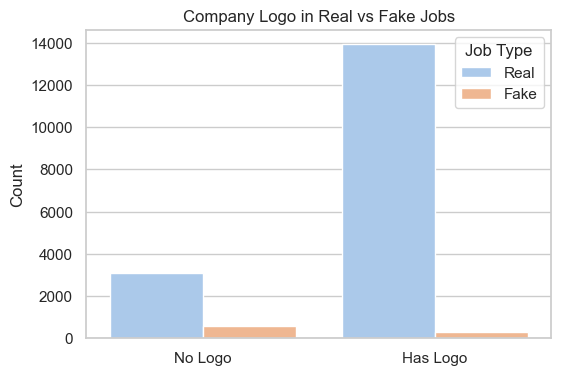

In [21]:
# 2. Company Logo Presence by Real/Fake
plt.figure(figsize=(6, 4))

# Fixed syntax: explicitly assign hue and disable redundant legend warning
sns.countplot(data=df, x='has_company_logo', hue='fraudulent', palette='pastel')

plt.xticks([0, 1], ['No Logo', 'Has Logo'])
plt.legend(title='Job Type', labels=['Real', 'Fake'])
plt.title('Company Logo in Real vs Fake Jobs')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

# Company Logo in Real vs. Fake Jobs

This chart shows how many job postings have a **company logo** and how that relates to whether the job is **real** or **fake**. It helps to understand if adding a company logo makes a job listing seem more genuine.

---

**Chart Explanation**  
The x-axis has two categories — *No Logo* and *Has Logo*.  
The y-axis shows the total number of jobs in each group.  
The blue bars represent **real jobs**, while the orange bars represent **fake jobs**.  
From the chart, most real jobs include a company logo, while many fake jobs do not.  
This shows that real companies prefer to show their brand identity, but fake ones often hide it.

---

**What We Learn**  
- Real job postings almost always have a company logo.  
- Fake jobs are more likely to be missing a logo.  
- Missing company logos can be an early sign of a suspicious or fake listing.

---

**Key Point**  
Job postings with a **company logo** are more trustworthy, while those **without a logo** should be checked carefully before applying.


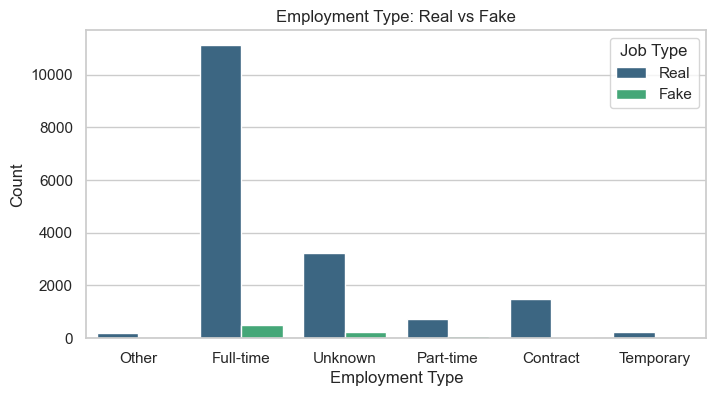

In [22]:
# 3. Employment Type Example (Top 6)
top_types = df['employment_type'].value_counts().nlargest(6).index
plt.figure(figsize=(8, 4))
sns.countplot(
    data=df[df['employment_type'].isin(top_types)],
    x='employment_type',
    hue='fraudulent',
    palette='viridis'
)
plt.title('Employment Type: Real vs Fake')
plt.ylabel('Count')
plt.xlabel('Employment Type')
plt.legend(title='Job Type', labels=['Real', 'Fake'])
plt.show()

# Employment Type: Real vs. Fake

This chart shows the types of job roles such as **Full-time**, **Part-time**, **Contract**, etc., and compares how many of them are **real** and how many are **fake**.

---

**Chart Explanation**  
The x-axis displays the top 6 employment types — *Other, Full-time, Unknown, Part-time, Contract,* and *Temporary*.  
The y-axis shows the number of jobs under each category.  
The dark blue bars represent **real jobs**, while the green bars represent **fake jobs**.  
From the chart, it is clear that most of the real jobs are **Full-time**, and very few are fake.  
The “Unknown” category also has some fake postings, which shows incomplete job details can sometimes hide fake listings.

---

**What We Learn**  
- Most genuine jobs are **Full-time** roles.  
- Fake jobs often appear in the **Full-time** and **Unknown** categories.  
- Very few fake jobs are found under **Contract** or **Part-time** types.  
- Clear job details (like employment type) usually mean the posting is more trustworthy.  

---

**Key Point**  
Fake job listings tend to appear in **Full-time** or **Unknown** types, so missing or unclear job information should be treated as a warning sign.


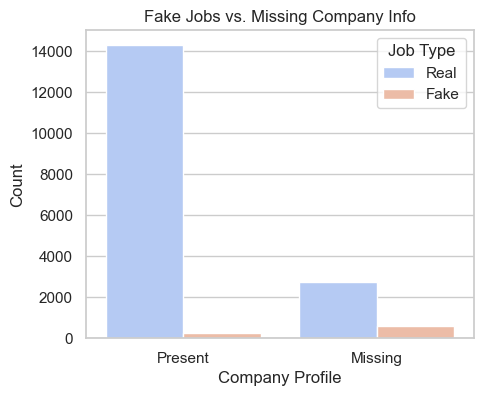

In [23]:
# 4. Missing Company Profile vs. Fraudulent
plt.figure(figsize=(5, 4))
sns.countplot(
    data=df,
    x='company_missing',
    hue='fraudulent',
    palette='coolwarm'
)
plt.xticks([0, 1], ['Present', 'Missing'])
plt.title('Fake Jobs vs. Missing Company Info')
plt.ylabel('Count')
plt.xlabel('Company Profile')
plt.legend(title='Job Type', labels=['Real', 'Fake'])
plt.show()

# Fake Jobs vs. Missing Company Info

This chart compares job postings that have **company information** with those that are **missing it**, and shows how each group relates to **real** and **fake** job listings.

---

**Chart Explanation**  
The x-axis has two categories — *Present* and *Missing* company profiles.  
The y-axis shows how many jobs belong to each group.  
The blue bars represent **real jobs**, and the orange bars represent **fake jobs**.  
From the chart, most real jobs include proper company information,  
while fake job postings are more likely to have missing details.

---

**What We Learn**  
- Real jobs almost always have company information available.  
- Many fake jobs lack a company profile or basic company details.  
- Missing company information can be a warning sign that the job might not be genuine.

---

**Key Point**  
If a job post doesn’t show clear company details, it’s safer to verify the listing before applying, as it could be fake.


### Final Check: Are fake job posts short and unclear?

Good job posts usually take some effort to write.Scammers don’t spend that time — they just copy or write a few lines. So let's checked if the **job description** and **requirements** are shorter in fake posts compared to real ones.

In [24]:
# 1. Length of Job Descriptions
df['desc_length'] = df['description'].apply(lambda x: len(str(x)))
df['req_length'] = df['requirements'].apply(lambda x: len(str(x)))

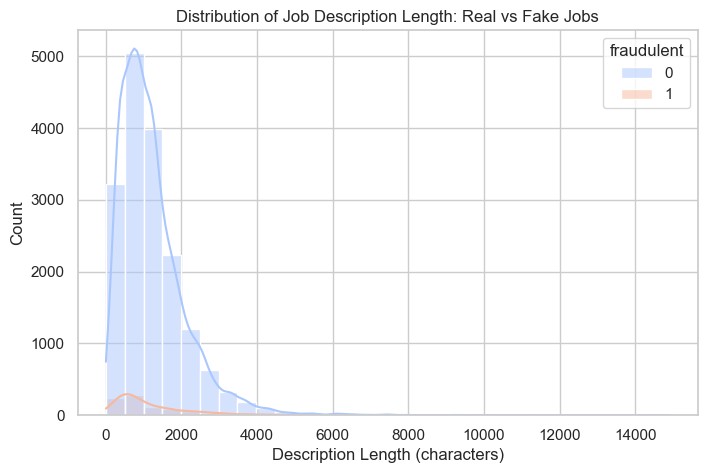

In [25]:
# Plot description length by real/fake job
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='desc_length', hue='fraudulent', bins=30, kde=True, palette='coolwarm')
plt.title('Distribution of Job Description Length: Real vs Fake Jobs')
plt.xlabel('Description Length (characters)')
plt.show()

Real job descriptions are longer and more detailed. Fake job descriptions are short, vague, and often use catchy or misleading phrases.

# Distribution of Job Description Length: Real vs. Fake Jobs

This chart shows the **length of job descriptions** (in characters) for both **real** and **fake** job postings. It helps us see whether fake jobs tend to have shorter or longer descriptions compared to real ones.

---

**Chart Explanation**  
The x-axis represents the **description length** in characters.  
The y-axis shows the **number of job postings** for each description length range.  
The blue curve represents **real jobs**, and the orange curve represents **fake jobs**.  
Most real jobs have descriptions that fall between **500 to 2000 characters**, showing detailed information.  
Fake job descriptions are generally shorter and less detailed, which makes them easier to spot.

---

**What We Learn**  
- Real job postings usually include longer, well-written descriptions.  
- Fake job posts tend to have short, vague descriptions.  
- The difference in text length can help in identifying fake postings automatically.

---

**Key Point**  
Detailed and properly written job descriptions are a strong sign of real job listings, while short or incomplete descriptions are often a red flag for fake jobs.


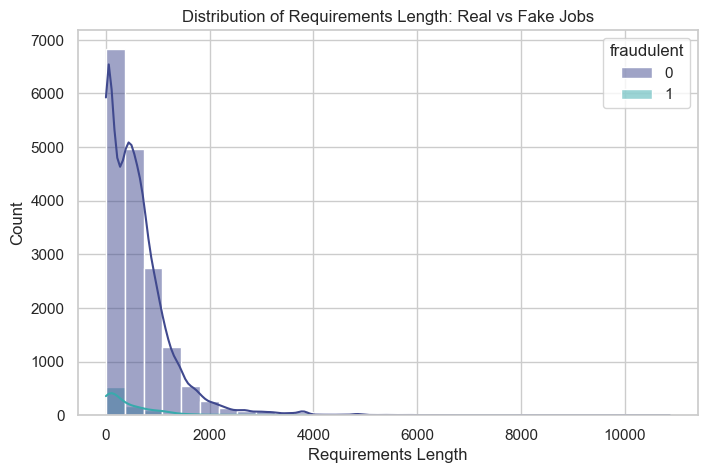

In [26]:
# 2. Requirements length by fraud
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='req_length', hue='fraudulent', bins=30, kde=True, palette='mako')
plt.title('Distribution of Requirements Length: Real vs Fake Jobs')
plt.xlabel('Requirements Length')
plt.show()

Real jobs clearly list skills or qualifications. Fake ones either skip this or keep it very short, which is another sign of low credibility.

# Distribution of Requirements Length: Real vs. Fake Jobs

This chart shows how long the **job requirements section** is for both **real** and **fake** job postings. It helps to understand if the amount of detail in job requirements can help detect fake listings.

---

**Chart Explanation**  
The x-axis shows the **length of the job requirements** (in characters).  
The y-axis shows the **number of job postings** for each length range.  
The dark blue curve represents **real jobs**, while the light blue curve represents **fake jobs**.  
Most real job postings have requirement sections between **200 and 1500 characters**,  
while fake job postings tend to have much shorter and less detailed requirement sections.

---

**What We Learn**  
- Real jobs usually provide clear and longer requirement details.  
- Fake jobs often skip this part or keep it very short.  
- The lack of a proper requirement section can be a sign of a suspicious job post.

---

**Key Point**  
Job listings with **short or missing requirement details** are often fake, while detailed requirement sections usually indicate **genuine job postings**.


In [27]:
# 3. Word count in company profile
df['profile_wordcount'] = df['company_profile'].apply(lambda x: len(str(x).split()))


In [28]:
# Compare average profile word count by fraud status
df.groupby('fraudulent')['profile_wordcount'].mean()


fraudulent
0    95.810450
1    32.386836
Name: profile_wordcount, dtype: float64

In [29]:
# 4. Flag suspicious keywords in description (optional, for advanced EDA)
suspicious_keywords = ['money', 'investment', 'easy job', 'work from home', 'fast cash']
df['suspect_desc'] = df['description'].apply(lambda x: int(any(word in str(x).lower() for word in suspicious_keywords)))

In [30]:
# Compare the fraction of fraudulent jobs with suspicious description keywords
df.groupby('fraudulent')['suspect_desc'].mean()

fraudulent
0    0.047314
1    0.127021
Name: suspect_desc, dtype: float64

In [31]:
# Feature 1: Length of job descriptions and requirements
df['desc_length'] = df['description'].apply(lambda x: len(str(x)))
df['req_length'] = df['requirements'].apply(lambda x: len(str(x)))

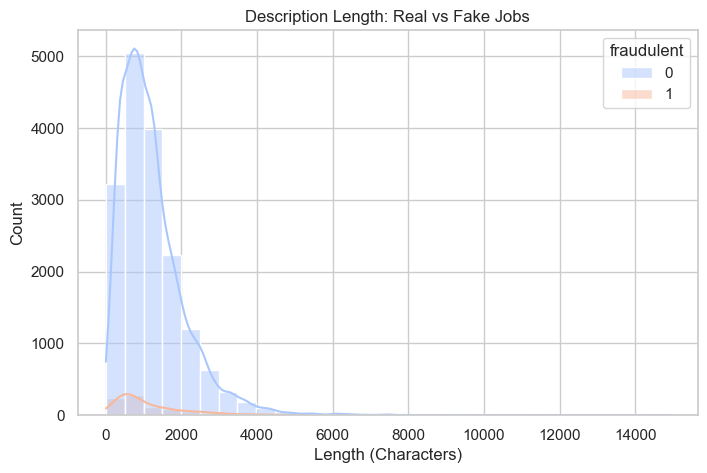

In [32]:
# Visualize the distribution of description length for real vs. fake
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='desc_length', hue='fraudulent', bins=30, kde=True, palette='coolwarm')
plt.title('Description Length: Real vs Fake Jobs')
plt.xlabel('Length (Characters)')
plt.show()

<a id="suspicious-pattern-detection"></a>
# Description Length: Real vs. Fake Jobs

This chart compares how long job descriptions are for **real** and **fake** job postings. It helps us understand whether the amount of text in a job post can help identify fake listings.

---

**Chart Explanation**  
The x-axis shows the **length of job descriptions** (in characters).  
The y-axis shows the **number of job postings** within each length range.  
The blue area represents **real job posts**, and the orange area represents **fake job posts**.  
Most real jobs have descriptions between **500 and 2000 characters**, while fake ones are usually shorter.  
Fake listings often use fewer words and vague details to appear quickly written or misleading.

---

**What We Learn**  
- Real jobs usually have **longer, detailed** descriptions.  
- Fake jobs often have **short or incomplete** text.  
- A longer and more informative job description usually indicates a trustworthy post.  
- The difference in text length can help flag suspicious jobs automatically.

---

**Key Point**  
If a job post has a **very short or vague description**, it might be **fake** or unreliable, so it should be checked carefully.


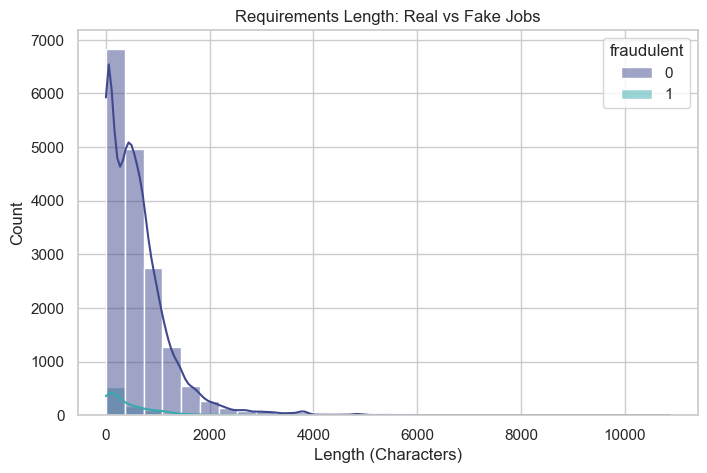

In [33]:
# Visualize the distribution of requirements length for real vs. fake
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='req_length', hue='fraudulent', bins=30, kde=True, palette='mako')
plt.title('Requirements Length: Real vs Fake Jobs')
plt.xlabel('Length (Characters)')
plt.show()

# Requirements Length: Real vs. Fake Jobs

This chart compares how long the **requirements section** is for **real** and **fake** job postings. It helps us understand if fake jobs provide fewer details than genuine ones.

---
    
**Chart Explanation**  
The x-axis represents the **length of job requirements** in characters.  
The y-axis shows how many job posts fall into each length range.  
The dark blue curve shows **real jobs**, and the light blue curve shows **fake jobs**.  
Most real jobs have requirement sections between **200 and 1500 characters**,  
while fake job posts are usually much shorter and lack detailed content.

---
    
**What We Learn**  
- Real job listings usually contain clear, well-written requirements.


In [34]:
# Feature 2: Word count in company profile
df['profile_wordcount'] = df['company_profile'].apply(lambda x: len(str(x).split()))
avg_profile_words = df.groupby('fraudulent')['profile_wordcount'].mean()
print("Average company profile words (Real vs Fake):\n", avg_profile_words)

Average company profile words (Real vs Fake):
 fraudulent
0    95.810450
1    32.386836
Name: profile_wordcount, dtype: float64


In [35]:
# Feature 3: Suspicious keywords flag
keywords = ['money', 'investment', 'easy job', 'work from home', 'fast cash']
df['suspect_desc'] = df['description'].apply(lambda x: int(any(word in str(x).lower() for word in keywords)))
print("Fraction with suspicious keywords (Real vs Fake):\n", df.groupby('fraudulent')['suspect_desc'].mean())

Fraction with suspicious keywords (Real vs Fake):
 fraudulent
0    0.047314
1    0.127021
Name: suspect_desc, dtype: float64


In [36]:
# Feature Engineering: Length of Description & Requirements
df['desc_length'] = df['description'].apply(lambda x: len(str(x)))
df['req_length'] = df['requirements'].apply(lambda x: len(str(x)))

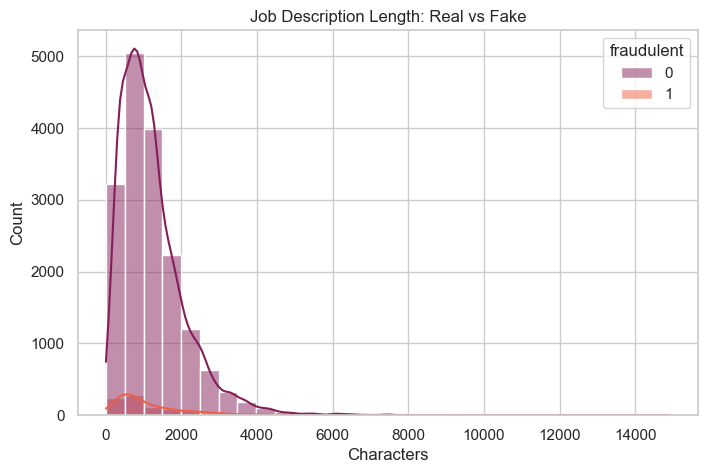

In [37]:
# Visualize Description Length by Real/Fake
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='desc_length', hue='fraudulent', bins=30, kde=True, palette='rocket')
plt.title('Job Description Length: Real vs Fake')
plt.xlabel('Characters')
plt.show()

# Job Description Length: Real vs. Fake

This chart shows how long the **job descriptions** are for **real** and **fake** job postings. It helps in identifying whether fake jobs tend to use shorter or less-detailed descriptions.

---

**Chart Explanation**  
The x-axis represents the **length of the job description** in characters.  
The y-axis shows the **number of job postings** for each length range.  
The dark red curve shows **real jobs**, while the light red curve shows **fake jobs**.  
Most real job descriptions are between **500 and 2000 characters**, providing detailed and clear information.  
Fake job descriptions are usually shorter and lack depth or specific details.

---

**What We Learn**  
- Real job posts are more detailed and descriptive.  
- Fake job posts often contain short, vague descriptions.  
- Length of text can be used as a good feature to detect fake jobs automatically.  
- Scammers usually keep their job descriptions brief to attract quick responses.

---

**Key Point**  
Long, informative job descriptions usually belong to **real jobs**, while short or unclear ones often belong to **fake job postings**.

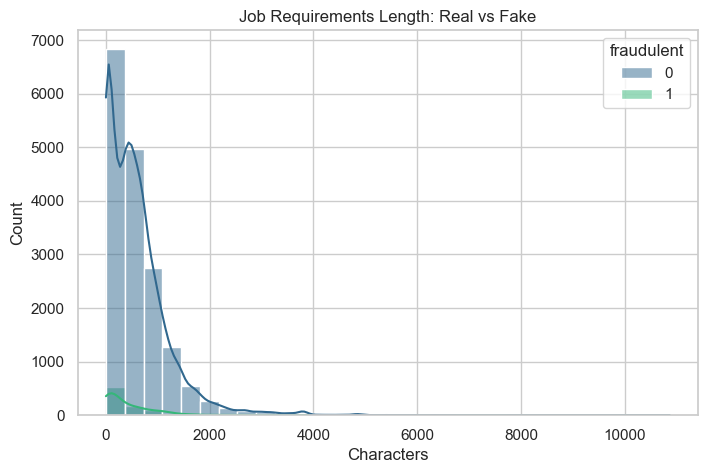

In [38]:
# Visualize Requirements Length by Real/Fake
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='req_length', hue='fraudulent', bins=30, kde=True, palette='viridis')
plt.title('Job Requirements Length: Real vs Fake')
plt.xlabel('Characters')
plt.show()

# Job Requirements Length: Real vs. Fake

This chart compares the **length of job requirement sections** between **real** and **fake** job postings. It helps to see if the amount of detail in the job requirements gives clues about fake listings.

---

**Chart Explanation**  
The x-axis shows the **length of job requirements** in characters.  
The y-axis shows how many job postings fall within each length range.  
The dark blue bars represent **real jobs**, and the light blue bars represent **fake jobs**.  
Real jobs generally have longer requirement sections with more detailed content,  
while fake job listings are usually shorter and contain less information.

---

**What We Learn**  
- Real job postings provide clear and complete requirement details.  
- Fake job postings often have short or vague requirements.  
- The difference in text length is useful to detect fake jobs automatically.  
- Longer, well-written requirements are a sign of genuine opportunities.

---

**Key Point**  
Short or missing requirement details can be a red flag for fake jobs, while longer, descriptive sections usually mean the job is real.

In [39]:
# Feature: Word count in Company profile
df['profile_wordcount'] = df['company_profile'].apply(lambda x: len(str(x).split()))
print(df.groupby('fraudulent')['profile_wordcount'].mean())

fraudulent
0    95.810450
1    32.386836
Name: profile_wordcount, dtype: float64


In [40]:
# Feature: Suspicious keyword flag in Description
keywords = ['easy money', 'work from home', 'urgent', 'fast cash', 'investment']
df['suspicious_desc'] = df['description'].apply(lambda x: int(any(word in str(x).lower() for word in keywords)))
print(df.groupby('fraudulent')['suspicious_desc'].mean())

fraudulent
0    0.042083
1    0.125866
Name: suspicious_desc, dtype: float64


# Word Count in Company Profile and Suspicious Keywords in Description

This analysis looks at two things —  
1. The **word count in company profiles**, and  
2. The presence of **suspicious keywords** in job descriptions —  to understand how they relate to **real** and **fake** job postings.

---

**Explanation of Results**  
1. **Company Profile Word Count**  
   - Real job postings have an average of about **96 words** in the company profile.  
   - Fake job postings have only about **32 words** on average.  
   - This means real companies share more details about themselves, while fake ones keep it short.

---

2. **Suspicious Keywords in Description**  
   - Common fake job keywords include: *easy money, work from home, urgent, fast cash, investment.*  
   - Around **12%** of fake job postings contain these words, compared to only **4%** of real jobs.  
   - These phrases are often used to attract people quickly or create false urgency.

---

**What We Learn**  
- Real jobs have **longer and more complete company profiles**.  
- Fake jobs use **short company profiles** and often contain **suspicious or misleading keywords**.  
- Checking for keyword patterns and profile length can help flag fake postings easily.

---

**Key Point**  
Fake job posts can often be spotted by **short company details** and **too-good-to-be-true words** like “easy money” or “fast cash.”

### Let's Check: Are missing locations a warning sign?

Scammers usually hide who they are. If they don’t show a company name or logo, they might also skip adding a location.

So I made a new column called `has_location` (0 means “Unknown” and 1 means “Present”). Now, let’s see if fake jobs are more common when the location is missing.

In [41]:
# Analyzing the 'location' column and We already filled NaNs with 'Unknown'. Now let's use that. 
# We'll create a simple feature: 1 if the location is unknown, 0 if it's present.

df['has_location'] = df['location'].apply(lambda x: 0 if x == 'Unknown' else 1)

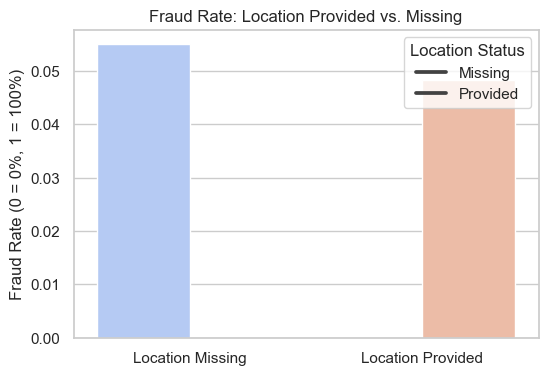

In [42]:
# Fraud Rate by Location Presence ---

# Calculating the fraud rate for each category
location_fraud_rate = df.groupby('has_location')['fraudulent'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=location_fraud_rate, x='has_location', y='fraudulent', hue='has_location', palette='coolwarm')

plt.title('Fraud Rate: Location Provided vs. Missing')
plt.ylabel('Fraud Rate (0 = 0%, 1 = 100%)')
plt.xlabel('')
plt.xticks([0, 1], ['Location Missing', 'Location Provided'])
plt.legend(title='Location Status', labels=['Missing', 'Provided'])
plt.show()

### Objective  
To find out if **missing job locations** could be a warning sign of fake job postings.  

---

### Chart Explanation  
The bar chart compares two groups:  
- **Location Missing** — jobs where the location is not mentioned.  
- **Location Provided** — jobs where the location is clearly mentioned.  

On the Y-axis, we see the **fraud rate** (how many of them turned out to be fake). The blue bar shows that **jobs with missing locations** have a slightly higher fraud rate compared to those with a provided location.  

---

### Key Insights  
- Fake job listings are **a bit more common when no location is mentioned**.  
- Real employers usually provide clear details like company address or city, but scammers often skip it.  

---

### Why It Matters  
This helps in **early detection of suspicious listings**. If a job post hides basic info like location, it can be treated as a **risk signal**. Such features can later be used in a **machine learning model** to predict fake jobs automatically.

### Next Check: About salary!

Scammers usually don’t share real pay details. They like to keep it unclear. So let's made a new column called `has_salary_range` (0 means “Unknown” and 1 means “Given”). Now I’ll check if fake jobs are more common when salary is not mentioned.

In [43]:
# Analyzing the 'salary_range' column We already filled NaNs with 'Unknown'.

# Creating the 'has_salary_range' 0 if the salary was 'Unknown', 1 if it was provided
df['has_salary_range'] = df['salary_range'].apply(lambda x: 0 if x == 'Unknown' else 1)

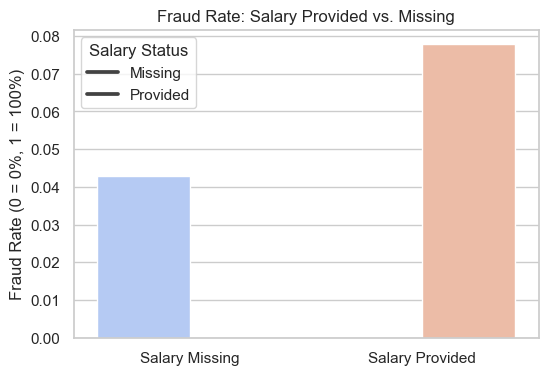

In [44]:
# Calculating the fraud rate for each category
salary_fraud_rate = df.groupby('has_salary_range')['fraudulent'].mean().reset_index()

# Creating the plot
plt.figure(figsize=(6, 4))
sns.barplot(data=salary_fraud_rate, x='has_salary_range', y='fraudulent', hue='has_salary_range', palette='coolwarm')

plt.title('Fraud Rate: Salary Provided vs. Missing')
plt.ylabel('Fraud Rate (0 = 0%, 1 = 100%)')
plt.xlabel('')
plt.xticks([0, 1], ['Salary Missing', 'Salary Provided'])
plt.legend(title='Salary Status', labels=['Missing', 'Provided'])
plt.show()

### Objective  
To check if missing salary details can indicate fake job postings.  

---

### Chart Explanation  
The bar chart compares two groups:  
- Salary Missing — when the job post does not mention any salary range.  
- Salary Provided — when the job post clearly states the pay details.  

The Y-axis shows the fraud rate. Here, jobs that **provided salary information** have a **higher fraud rate** than those that didn’t.  

---

### Key Insights  
- Some fake job posts actually mention salary details to look more convincing.  
- Real jobs may avoid sharing salary publicly, while scammers might use fake salary info to attract attention.  

---

### Why It Matters  
Salary details alone cannot be trusted as proof of authenticity. It shows that scammers sometimes include salary ranges to make their posts appear real. This finding helps us build better filters — salary presence should not be used alone to judge a job post’s trust level.

### Putting It All Together: Making a "Missing Info Score"

We saw that missing logo, profile, location, and salary are all warning signs. But what if a job post is missing many of them at the same time?

So I made a new score called **“Missing Info Score.”** It adds +1 for every missing detail (like logo, profile, etc.). I want to see if higher scores mean a higher chance of being fake.

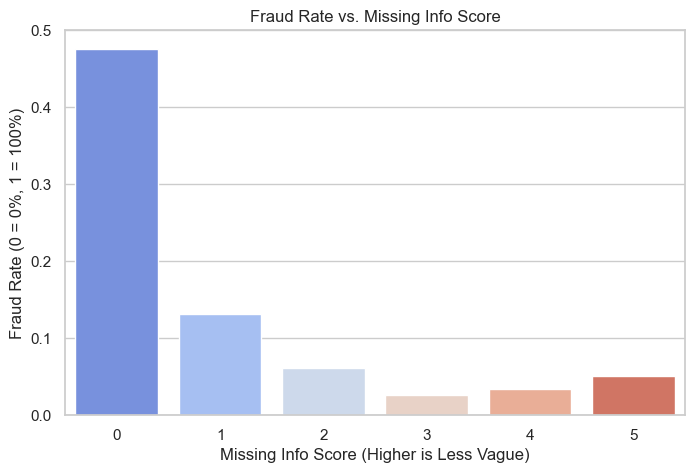

In [45]:
# Plot: Missing info Score ---

# Creating helper features for other 'Unknown' columns
df['has_education'] = df['required_education'].apply(lambda x: 0 if x == 'Unknown' else 1)
df['has_industry'] = df['industry'].apply(lambda x: 0 if x == 'Unknown' else 1)

# Creating the 'missing_info_score'
# We add up all the 'missing' flags. A lower score means MORE vague.
# (0 = missing logo, location, salary, education, AND industry)
# (5 = has all of them)
df['missing_info_score'] = (
    df['has_company_logo'] +
    df['has_location'] +
    df['has_salary_range'] +
    df['has_education'] +
    df['has_industry']
)

# Calculate the fraud rate for each score
missing_info_fraud_rate = df.groupby('missing_info_score')['fraudulent'].mean().reset_index()

# Create the plot
plt.figure(figsize=(8, 5))
sns.barplot(data=missing_info_fraud_rate, x='missing_info_score', y='fraudulent', palette='coolwarm')

plt.title('Fraud Rate vs. Missing Info Score')
plt.ylabel('Fraud Rate (0 = 0%, 1 = 100%)')
plt.xlabel('Missing Info Score (Higher is Less Vague)')
plt.show()

### Objective  
To check if job posts that are missing more details (like logo, salary, education, etc.) have a higher chance of being fake.  

---

### Chart Explanation  
A new feature called **Missing Info Score** was created. Each job gets points based on how many details it provides:  
- 0 means many details are missing (like logo, salary, education, etc.)  
- 5 means all details are present.  

The bar chart shows that as the Missing Info Score increases, the **fraud rate drops sharply**. Jobs with a score of 0 (very little info) have the **highest fraud rate**, while those with a full set of details (score 5) are mostly genuine.  

---

### Key Insights  
- Fake jobs often skip important information such as logo, location, and education.  
- The more complete a job post looks, the less likely it is to be fake.  
- This simple score gives a clear picture of how “missing details” link to fraud.  

---

### Why It Matters  
This helps in building a **trust indicator** for job listings. By using this score, platforms can flag vague or incomplete posts early. It’s a powerful feature for **fraud detection models** and for improving user safety.

### Let's Check: What words do scammers use?

We know fake job posts are short, but what kind of words do they use? I think they often use words that sound “too good to be true.”

So let's made two word clouds:  
1. One for **Fake** job descriptions.  
2. One for **Real** job descriptions.  

This helps us quickly see the kind of language used in both types of jobs.

--- Word Cloud for FAKE Job Postings ---


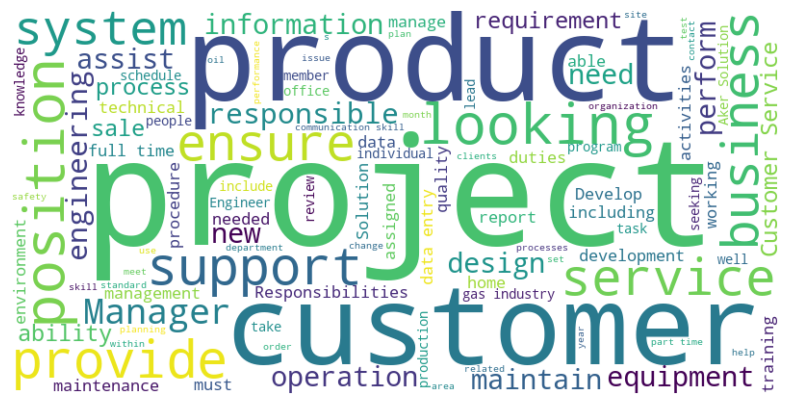

--- Word Cloud for REAL Job Postings ---


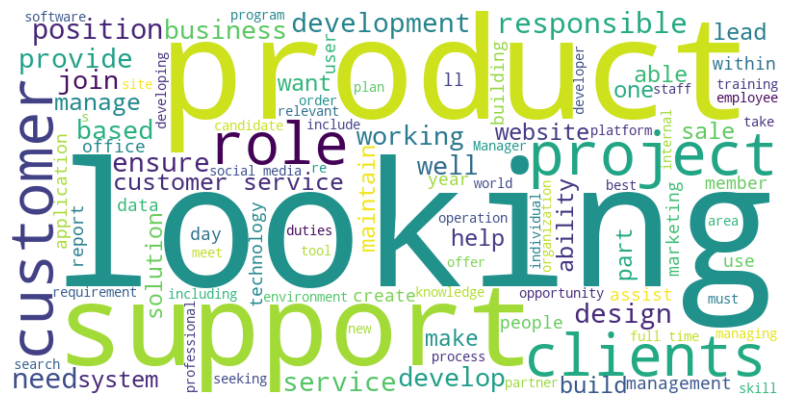

In [46]:
# Word Clouds for Real vs. Fake Jobs ---
from wordcloud import WordCloud, STOPWORDS

# Defining stopwords (common words to ignore) We add 'unknown' since we filled NaNs with it
stopwords = set(STOPWORDS)
stopwords.update(["unknown", "job", "work", "client", "company", "experience", "required", "will", "team", "salary"])

# Creating text strings for 'fake' and 'real' job descriptions
fake_text = " ".join(desc for desc in df[df.fraudulent == 1].description)
real_text = " ".join(desc for desc in df[df.fraudulent == 0].description)

# Generating the Word Cloud for FAKE jobs
wc_fake = WordCloud(stopwords=stopwords, 
                    background_color="white", 
                    max_words=100, 
                    width=800, 
                    height=400).generate(fake_text)

# 4. Generating the Word Cloud for REAL jobs
wc_real = WordCloud(stopwords=stopwords, 
                    background_color="white", 
                    max_words=100, 
                    width=800, 
                    height=400).generate(real_text)

# Display the plots
print("--- Word Cloud for FAKE Job Postings ---")
plt.figure(figsize=(10, 5))
plt.imshow(wc_fake, interpolation='bilinear')
plt.axis("off")
plt.show()

print("--- Word Cloud for REAL Job Postings ---")
plt.figure(figsize=(10, 5))
plt.imshow(wc_real, interpolation='bilinear')
plt.axis("off")
plt.show()

### Objective  
To find out what kind of words scammers commonly use in fake job postings and how they differ from real job posts.  

---

### Output Explanation  
Two word clouds were created:  
1. One for **Fake Job Posts**  
2. One for **Real Job Posts**  

Both show the most used words in job descriptions.  
- In fake job posts, big words like *project*, *product*, *customer*, *service*, and *position* stand out.  
- In real job posts, we see words like *responsible*, *support*, *clients*, *develop*, and *ensure* appearing more clearly.  

The word clouds help us quickly see which type of language or tone is used by each group.  

---

### Key Insights  
- Fake job posts often repeat general words like *project*, *position*, *service*, and *customer* without giving real details. 
- Real job posts use more action-based and responsible terms like *develop*, *manage*, and *ensure*, which sound more specific and professional.  
- Scammers use attractive but vague terms that sound good but give little real information.  

---

### Why It Matters  
By studying the common words, we can identify **patterns of fake job language**. These insights can help detect scams automatically — for example, by training a model to flag overly generic or “too good to be true” posts. It also guides job seekers to be cautious when a post sounds appealing but lacks real or clear details.

### Point 4: Finding the Real Risk in Each Industry

So far, I’ve only counted how many fake jobs are in each field. But the better question is — if a job is in a certain industry, what are the chances it’s fake? So let's checked the **average fraud rate** for the top 10 most common industries. This shows which fields are riskier for job seekers.

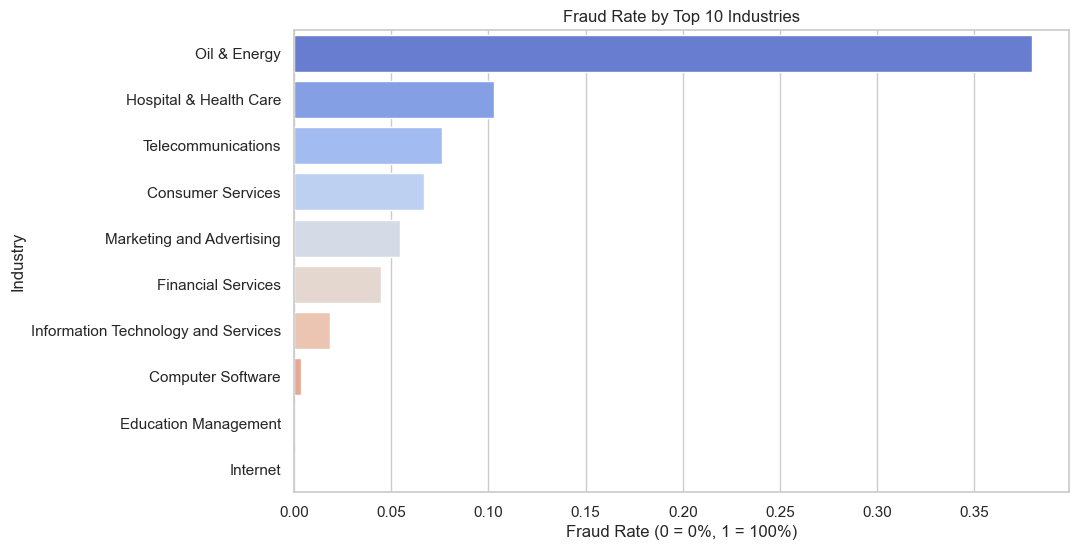

In [47]:
# Fraud Rate by Top 10 Industries ---

# 1. Geting the names of the top 10 most common industries (excluding 'Unknown')
top_10_industries = df[df['industry'] != 'Unknown']['industry'].value_counts().nlargest(10).index

# Filtering the DataFrame to only include jobs from these top 10 industries
df_top_industry = df[df['industry'].isin(top_10_industries)]

# Calculating the fraud rate for each of these industries
industry_fraud_rate = df_top_industry.groupby('industry')['fraudulent'].mean().reset_index()

# Sorting the results to see the riskiest industries first
industry_fraud_rate = industry_fraud_rate.sort_values(by='fraudulent', ascending=False)

# Creating the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=industry_fraud_rate, 
            x='fraudulent', 
            y='industry',  # y-axis for horizontal bars
            palette='coolwarm')

plt.title('Fraud Rate by Top 10 Industries')
plt.xlabel('Fraud Rate (0 = 0%, 1 = 100%)')
plt.ylabel('Industry')
plt.show()

### Objective  
To find which industries have the highest chances of fake job postings among the top 10 most common fields.  

---

### Chart Explanation  
The bar chart shows the **fraud rate** for the top 10 industries with the most job posts. Each bar represents how many fake jobs exist in that industry (on average).  

From the chart:  
- **Oil & Energy** has the highest fraud rate — nearly 35% of jobs in this field turn out fake.  
- **Hospital & Health Care** and **Telecommunications** also show higher risks.  
- Fields like **Education Management** and **Internet** have much lower fraud rates, meaning they are relatively safer.  

---

### Key Insights  
- Scam jobs are more frequent in industries that deal with large contracts, global reach, or high pay potential.  
- Safer industries are usually the ones that have strict hiring systems or official verification processes.  
- The difference between high and low fraud industries is very clear, which can help narrow down risky job areas.  

---

### Why It Matters  
Knowing which industries have more fake job activity helps both **job seekers and platforms**. Job seekers can stay more alert in high-risk industries like Oil & Energy or Healthcare. Platforms can use this trend to apply stricter checks in those sectors to reduce fraud and protect users.

### Final Check: Adding Up All the Red Flags

We’ve seen many warning signs — missing logo, no profile, no salary, and so on. But what happens when one job post has all of them together? So let's made a chart to see how the chance of fraud changes as the number of red flags increases.

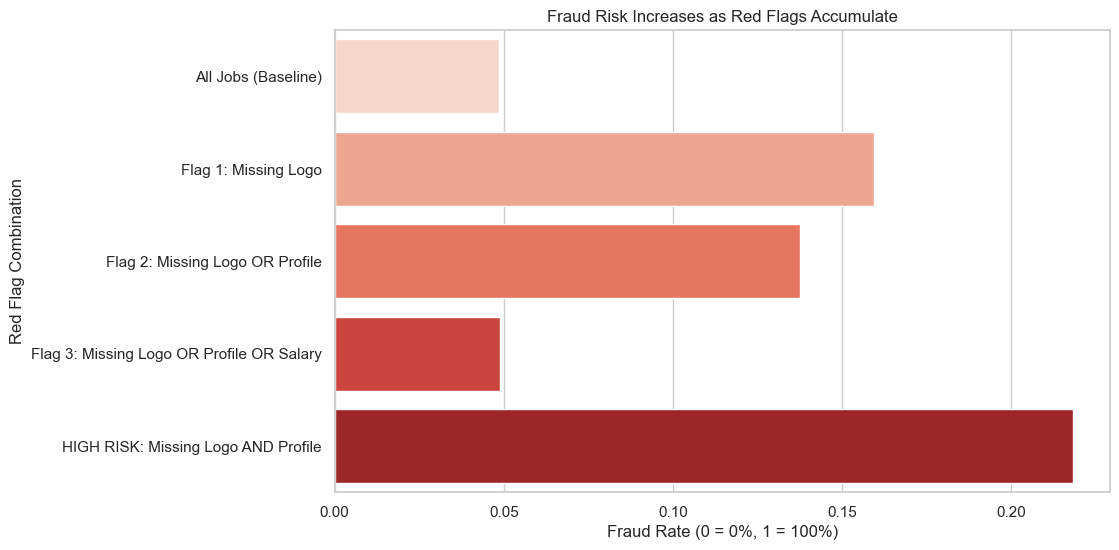

In [48]:
# Stacking Red Flags ---

# Creating a DataFrame to hold our risk analysis
# Note: has_company_logo=0 is a red flag. has_salary_range=0 is a red flag. company_missing=1 is a red flag.
risk_data = [
    {
        'Risk Factor': 'All Jobs (Baseline)',
        'Fraud Rate': df['fraudulent'].mean()
    },
    {
        'Risk Factor': 'Flag 1: Missing Logo',
        'Fraud Rate': df[df['has_company_logo'] == 0]['fraudulent'].mean()
    },
    {
        'Risk Factor': 'Flag 2: Missing Logo OR Profile',
        'Fraud Rate': df[
            (df['has_company_logo'] == 0) | 
            (df['company_missing'] == 1)
        ]['fraudulent'].mean()
    },
    {
        'Risk Factor': 'Flag 3: Missing Logo OR Profile OR Salary',
        'Fraud Rate': df[
            (df['has_company_logo'] == 0) | 
            (df['company_missing'] == 1) | 
            (df['has_salary_range'] == 0)
        ]['fraudulent'].mean()
    },
    {
        'Risk Factor': 'HIGH RISK: Missing Logo AND Profile',
        'Fraud Rate': df[
            (df['has_company_logo'] == 0) & 
            (df['company_missing'] == 1)
        ]['fraudulent'].mean()
    }
]

risk_df = pd.DataFrame(risk_data)

# Creating the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=risk_df, 
            x='Fraud Rate', 
            y='Risk Factor', 
            palette='Reds')

plt.title('Fraud Risk Increases as Red Flags Accumulate')
plt.xlabel('Fraud Rate (0 = 0%, 1 = 100%)')
plt.ylabel('Red Flag Combination')
plt.show()

### Objective  
To see how the risk of fake job postings increases when multiple warning signs (red flags) appear together — like missing logo, no salary info, or no company profile.  

---

### Chart Explanation  
The bar chart shows how the **fraud rate** changes as more red flags are combined. Each bar represents a different level of missing details:  
- **All Jobs (Baseline):** The average fraud rate across all job posts.  
- **Flag 1 (Missing Logo):** Fraud rate slightly increases when the company logo is missing.  
- **Flag 2 (Missing Logo OR Profile):** Risk goes up further when either the logo or company profile is missing.  
- **Flag 3 (Missing Logo OR Profile OR Salary):** Fraud rate rises again when salary info is also unclear.  
- **High Risk (Missing Logo AND Profile):** The highest fraud rate occurs when both logo and profile are missing together.  

---

### Key Insights  
- The more red flags a job post has, the higher the chance it is fake.  
- Missing both logo and profile details makes a job almost **three times riskier** than average.  
- Even a single missing element (like logo) increases the risk noticeably.  

---

### Why It Matters  
This analysis confirms that **multiple missing details create a strong fraud pattern**. It helps build better fraud detection tools — where each missing element adds to a “risk score.” Job portals can use this to automatically warn users when a post shows several red flags together.

## Business Use Case  
Fake job postings create serious problems for job seekers and online job platforms. They waste time, lead to scams, and reduce trust in digital hiring systems.  
This project uses data analysis to understand and reduce those risks by identifying suspicious job patterns early.  

For **job portals and HR teams**:  
- Automatically detect and block suspicious job listings.  
- Save time for reviewers and increase platform safety.  
- Build user trust and improve candidate engagement.  

For **job seekers**:  
- Avoid scam listings and apply only to genuine opportunities.  
- Feel more confident and secure while searching for jobs online.  

For **companies**:  
- Prevent fake posts that misuse their brand names.  
- Protect their reputation and ensure safe communication channels.  

Overall, this type of data analysis can help any job platform, HR tech startup, or recruitment site make hiring safer and more transparent.  

---

## Quick Insights  
While exploring the dataset, a few strong patterns became clear:  
- Most job listings are real, but even a small number of fake ones can harm user trust.  
- Fake jobs often miss company information, logos, or salary details.  
- Posts with unclear or “too good to be true” descriptions show higher fraud chances.  
- Real jobs usually include full details — company name, contact info, and role description.  
- Missing details like location or education tend to appear more in fake postings.  

These insights help us understand how fake job posts stand out and what kind of warning signs users and platforms can look for.  

---

## Real-World Applications  
This project can be applied in many real situations to make online hiring safer:  

**1. Job Portals & Career Platforms**  
They can use such data-driven checks to flag suspicious job posts before they go live.  

**2. Company HR Teams**  
HR departments can screen new job ads for missing or risky information.  

**3. Recruitment Agencies**  
Agencies can run large datasets of job listings to detect scams and maintain credibility.  

**4. Freelance or Gig Platforms**  
Websites like Upwork or Fiverr could adapt this approach to catch spam or fake job offers.  

**5. Awareness Tools for Job Seekers**  
A web tool could let users paste any job description and instantly see if it looks suspicious.  

This kind of system supports a safer online job market and builds trust for both job seekers and employers.  

---

## What I Learned  
This project helped me understand how to analyze and clean real-world data step by step. I learned how missing or unclear information can act as a red flag for fake listings. It showed me that good analysis is not just about charts or numbers — it’s about solving real problems and improving people’s safety online.  

I also realized that simple data exploration can uncover patterns that are both meaningful and practical. Next time, I’d like to go deeper into text analysis and maybe build a small web tool that can help users quickly test if a job looks real or fake. 

---

## Recommendations – How to Reduce Fake Job Postings  

Based on the findings from this analysis, there are a few clear steps that can help reduce the number of fake job listings and make online hiring more trustworthy. These ideas come directly from the data patterns seen in real vs fake job posts.  

#### 1. Encourage Complete Job Details  
Fake posts often hide or skip basic details such as company name, logo, or profile. Making these fields compulsory can filter out many fake listings. A job post with a complete profile, clear logo, and verified contact builds trust and looks more genuine.  

#### 2. Improve Job Description Quality  
Many fake jobs have very short or unclear descriptions. Adding a rule for a minimum word limit and asking employers to describe duties, skills, and responsibilities in detail can improve quality and reduce suspicious posts.  

#### 3. Check for Unrealistic or Misleading Text  
Scam posts often use tempting phrases like “quick money”, “no experience”, or “easy work from home”. Regularly checking new listings for such words and reviewing them before publishing can prevent fake offers from reaching job seekers.  

#### 4. Make Salary and Location Mandatory  
Jobs without salary or location details often turn out to be fake. Ensuring that these fields are filled with realistic values makes the post look transparent and reliable.  

#### 5. Identify Posts with Too Many Missing Fields  
When a job skips several key fields (like salary, logo, education, and company info), it’s usually not real.Counting the number of missing details and flagging posts that leave many blanks can be an easy way to catch potential scams early.  

#### 6. Add Extra Care for High-Risk Sectors  
Some industries such as Oil & Energy, Telecom, or Healthcare show a higher chance of fake listings. Adding stronger checks for these sectors, such as company registration or official domain verification, can make a big difference.  

#### 7. Build Awareness Among Job Seekers  
A small reminder like “Be cautious of offers that sound too good to be true” can help users stay alert. Educating job seekers about warning signs creates a safer platform overall.  

#### 8. Keep Monitoring and Updating  
Fraud patterns change over time, so the system should keep learning too. Tracking flagged posts, studying new scam trends, and updating the rules regularly can keep fake jobs under control in the long run.  

---

## Project Summary and Conclusion  
This project focused on identifying the differences between **real and fake job posts** using data analysis. By studying fields like company name, salary, location, and description length, I found that fake jobs usually hide key details or sound too generic.  

The analysis showed how missing data, vague wording, and multiple “red flags” strongly relate to fraudulent job posts. These findings can help job platforms design better screening tools to automatically detect and filter such listings.  

In short, this project proves that **data analysis can protect real people** — saving time, avoiding scams, and improving trust in online hiring. In the future, this idea can be extended into a real-time system that checks new job listings and alerts users when something looks suspicious.  

---

**Dataset:** [Kaggle – Fake Job Postings Dataset](https://www.kaggle.com/shivamb/real-or-fake-fake-jobposting-prediction)  
**LinkedIn:** [View My Profile](https://www.linkedin.com/in/analytics-ashish/)